#                                                     <center> SALES DATA ANALYSIS USING PYTHON </center>

#### <center>Purpose: Analyze sales data to identify trends, 5 top-selling products, and revenue metrics for business decision-making.</center>

#### 1.0.1 Importing Libraries

In [4]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 #### 1.0.2 Importing DataFrame

In [6]:
df = pd.read_csv('Sales_Data.csv')

In [7]:
df.shape # number of rows and columns

(185950, 11)

In [8]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


The value for hour is Zero because it has no decimal place representing insignificant hours spent in selling Macbook Pro Laptop	

In [10]:
df.info() # basic info about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [11]:
df.isnull().sum() # Check for null values

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

Observation: The dataset is complete,with no missing values.

In [13]:
df.describe() # basic statistics of the DataFrame

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


### <center> DATA CLEANING</center>

#### 1.1.0 Extracting year from the date column.

In [16]:
# Extracting year from the date column.
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year 
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Year
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019


#### 1.1.1 Removing Date and other columns

In [18]:
columns_to_drop = ['Unnamed: 0', 'Order Date']
df= df.drop(columns=columns_to_drop) #They are irrelevant to the analysis

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Year
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019


In [20]:
df_2019 = df # Nameing the dataset from df to df_2019

#### 1.1.2 Filtering Year 2019 

In [22]:
df_2019 = df_2019[df_2019['Year'] == 2019] # Filtering only 2019 data from the dataset for analysis

In [23]:
df_2019

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Sales,City,Hour,Year
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,2019
185946,222906,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",6,149.99,New York City,19,2019
185947,222907,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019
185948,222908,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,2019


#### 1.1.3 Fiscal Year Metric

In [25]:
def calculate_fiscal_insights(df_2019):
    total_sales_millions = df_2019['Sales'].sum() 
    total_quantity = df_2019['Quantity Ordered'].sum()
    unique_cities = df_2019['City'].nunique()
    unique_products = df_2019['Product'].nunique()

    fiscal_insight = pd.DataFrame({
        'Metric': ['Total Sales (Million $) ', 'Total Quantity Ordered (Units)', 'Number_of_Cities', 'Number_of_Products'],
        'Value': [round(total_sales_millions, 2), total_quantity, unique_cities, unique_products]
    })

    return fiscal_insight

fiscal_insight = calculate_fiscal_insights(df_2019)
print(fiscal_insight)

                           Metric        Value
0        Total Sales (Million $)   34483365.68
1  Total Quantity Ordered (Units)    209038.00
2                Number_of_Cities         9.00
3              Number_of_Products        19.00


#### 1.1.4  Converting the Months in numbers to Names 

In [82]:
# Create a dictionary mapping month numbers to names
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'  
}
# Sample DataFrame
# data_ = {'month_number': [1, 5, 12, 3]}
#df_2019 = pd.DataFrame(data)

# Map month numbers to month names
df_2019['month_name'] = df['Month'].map(month_dict)

# Replace the original column with the new one
#df['month_number'] = df['month_name']
#df.drop('month_name', axis=1, inplace=True)

In [28]:
columns_to_drop_month = ['Month'] #Revoving the month in munbers since its irrelevant 
df_2019= df_2019.drop(columns=columns_to_drop_month)  

In [29]:
df_2019 

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,City,Hour,Year,month_name
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",1700.00,New York City,0,2019,December
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",600.00,New York City,7,2019,December
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",11.95,New York City,18,2019,December
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",149.99,San Francisco,15,2019,December
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",11.95,Atlanta,12,2019,December
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",2.99,Boston,19,2019,June
185946,222906,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",149.99,New York City,19,2019,June
185947,222907,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",11.95,San Francisco,18,2019,June
185948,222908,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",11.95,San Francisco,18,2019,June


### <center> VISUALISATION </center>

#### 1.2.0 Product Sales

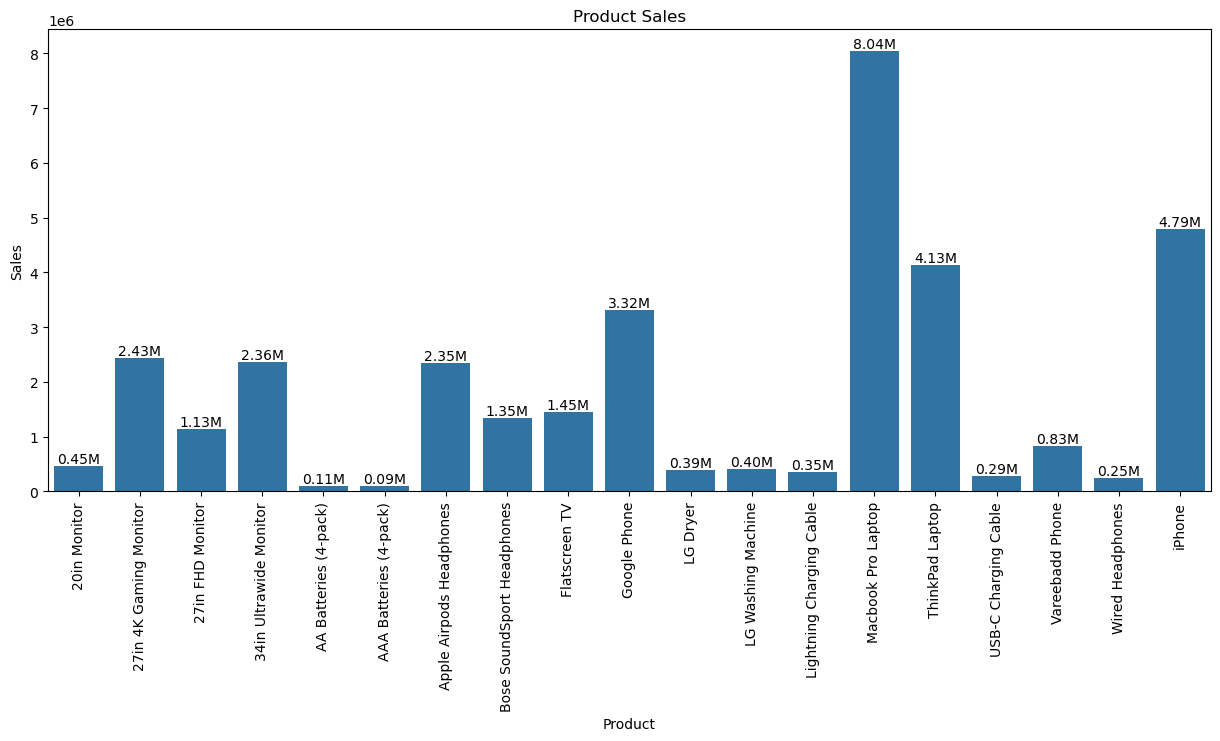

In [32]:
# Product Sales
product_sales = df_2019.groupby('Product')['Sales'].sum()

# The bar plot
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=product_sales.index, y=product_sales.values)

# Add sales values to the bars (fix indentation)
for i, val in enumerate(product_sales.values):
    plt.text(i, val, f'{val / 1000000:.2f}M', ha='center', va='bottom')

plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Product Sales')
plt.xticks(rotation=90)
plt.show()




#### 1.2.1 Product Quantity Ordered

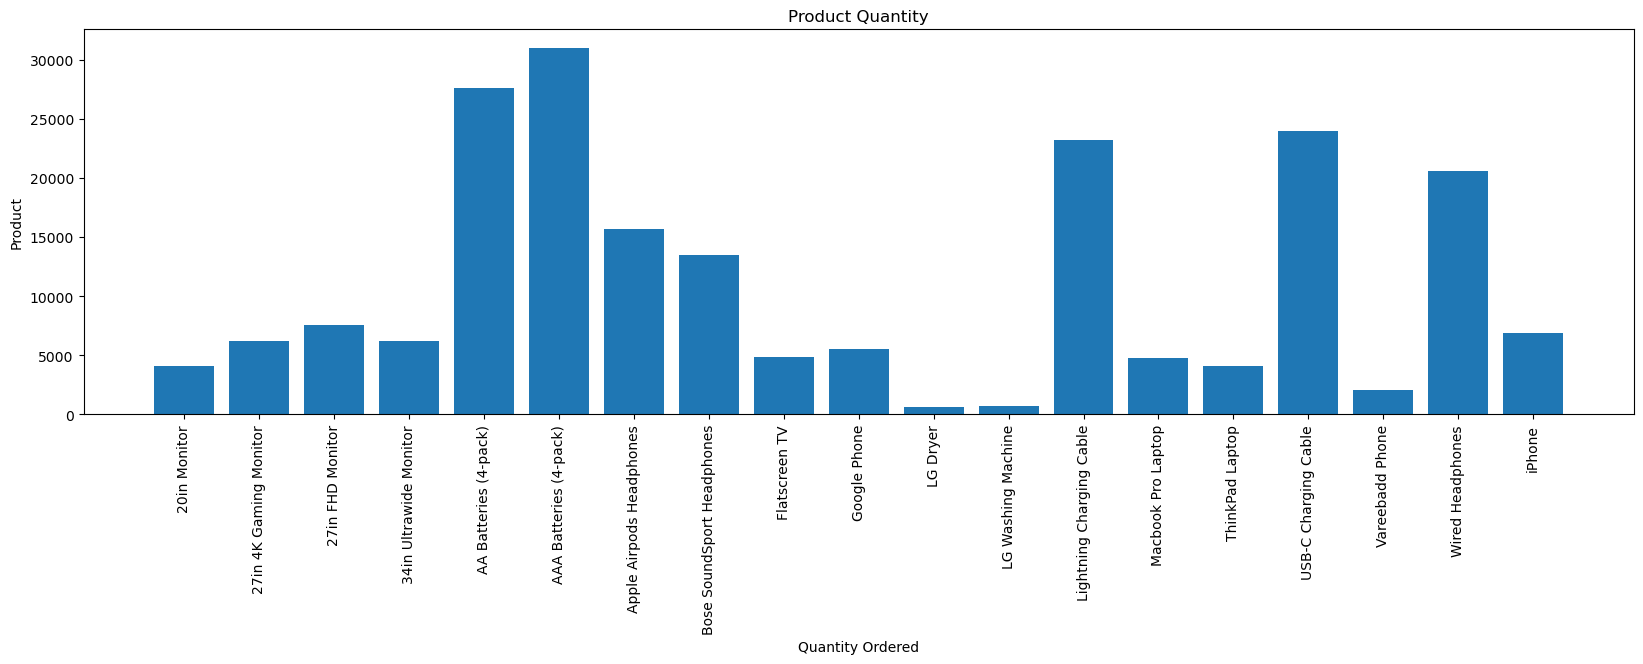

In [34]:
product_quantity = df_2019.groupby('Product')['Quantity Ordered'].sum()
# The bar chart
plt.figure(figsize=(20, 5))  # Set the figure size
plt.bar(product_quantity.index, product_quantity.values)
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.title('Product Quantity')
plt.xticks(rotation=90)
plt.show()

From the diagram. I obsereved the AAA Batteries(4-Packed) has the highest quantilty sold.

#### 1.2.2 Monthly Sales

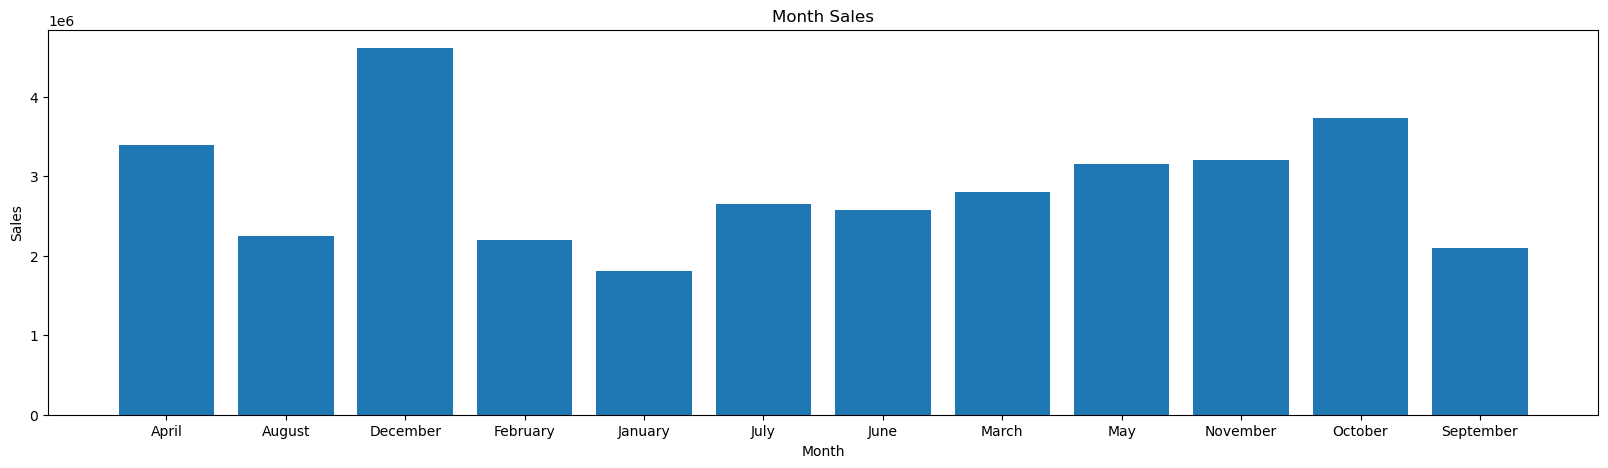

In [37]:
# Group by month and total sales
month_sales = df_2019.groupby('month_name')['Sales'].sum()
plt.figure(figsize=(20, 5))  # Set the figure size    
plt.bar(month_sales.index, month_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Month Sales')
plt.show()

In the diagram above. We observed that the month of december has the higherest sales followed by october and April.

#### 1.2.3 Top 5 Selling Products

In [40]:
#Group by Produc and Sales
product_sales = df_2019.groupby('Product')['Sales'].sum()
top_5_products = product_sales.sort_values(ascending=False).head(5)

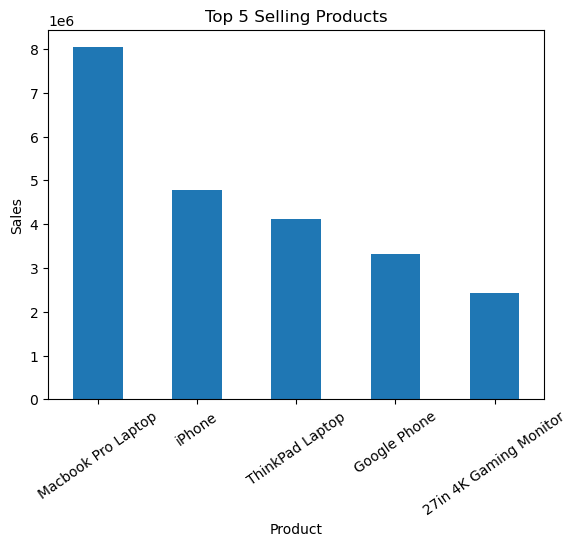

In [41]:
top_5_products.plot(kind='bar')
plt.ylabel('Sales')
plt.title('Top 5 Selling Products')
plt.xticks(rotation=35)
plt.show()

In the diagram, the top 5 selling ptoducts are MacBook Pro Laptop, iPhone, ThinkPad, Google Phone and 27in 4k Gaming Monitor

#### 1.2.4 Correlation Chart from Sales, Price, Quantity Ordered and Hour

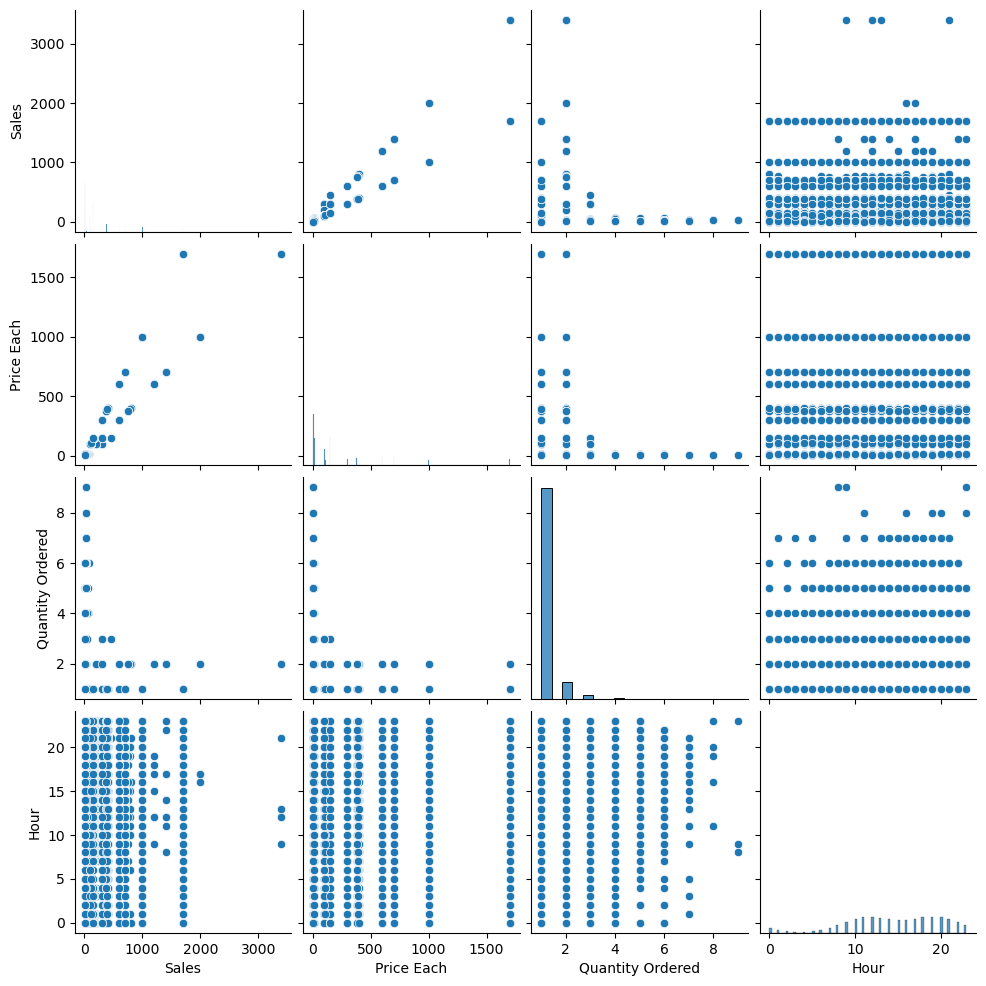

In [44]:
# Create a pair plot with specific columns
sns.pairplot(df_2019, vars=['Sales', 'Price Each', 'Quantity Ordered', 'Hour'], kind='scatter')  

Boservation:
The chart reveals a negative correlation between product price and Quantity ordered. 
The higher the price the lower number of quantity ordered.
A significant hours were spent on the sales of products with the least revenue Hours to sales.    

#### 1.2.5 City Sales

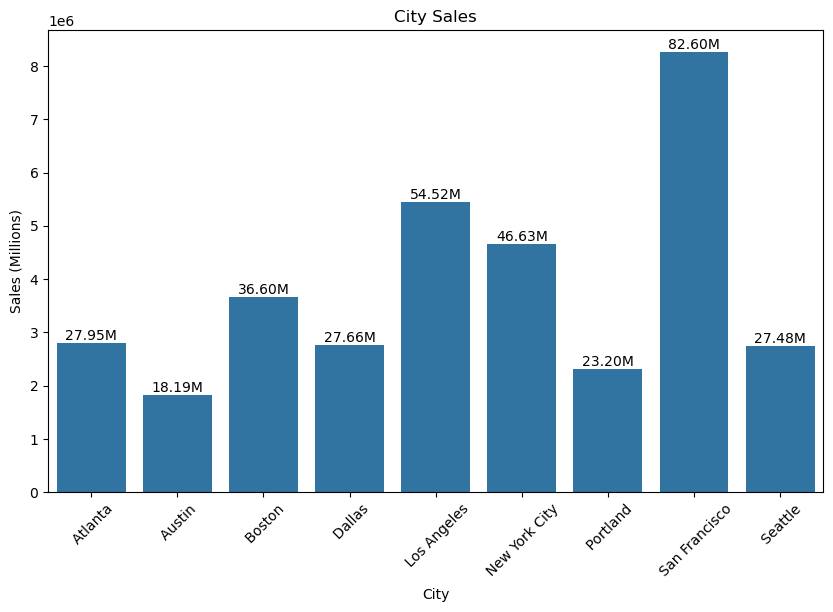

In [47]:
#  city sales
city_sales = df_2019.groupby('City')['Sales'].sum()

# The bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=city_sales.index, y=city_sales.values)  # Using Seaborn for potential customization

# Add sales values to the bars (fix indentation)
for i, val in enumerate(city_sales.values):
    plt.text(i, val, f'{val / 100000:.2f}M', ha='center', va='bottom')

# the plot
plt.xlabel('City')
plt.ylabel('Sales (Millions)')
plt.title('City Sales')
plt.xticks(rotation=45)

plt.show()

In the diagram we realize San Francisco recorded the highest of $82.60M followed by Los Angeles $54.52M and New York City 46.63M

#### 1.2.6 Monthly Quantity Ordered

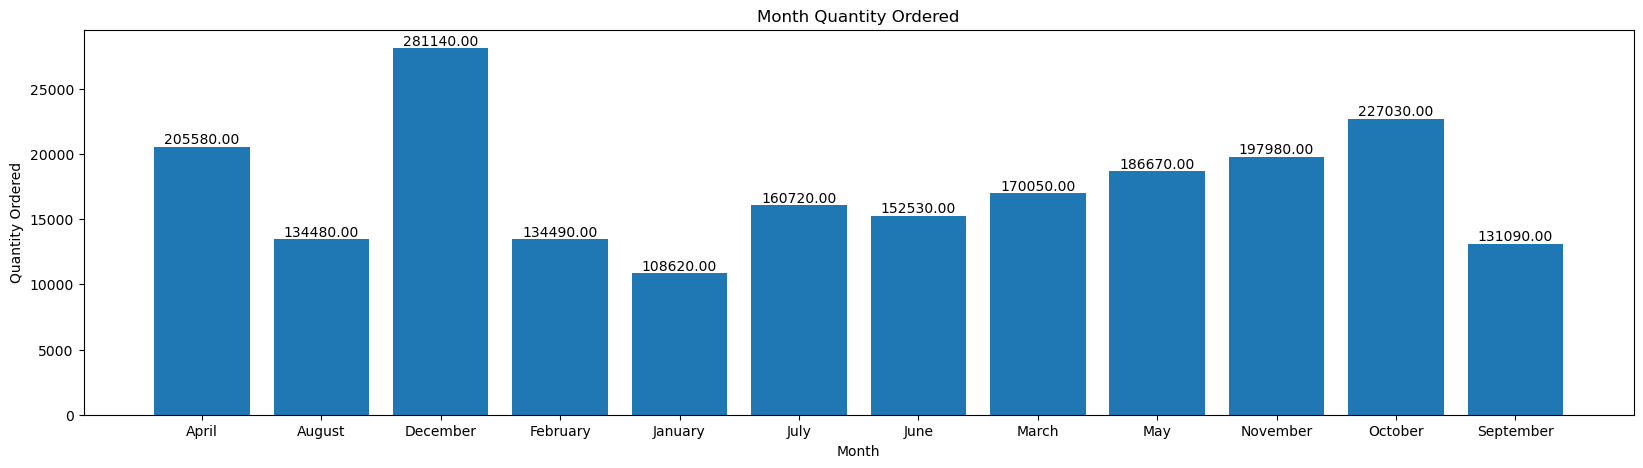

In [50]:
# Group by month_quantity and calculate Quantity Ordered
month_quantity = df_2019.groupby('month_name')['Quantity Ordered'].sum()
plt.figure(figsize=(20, 5))  # Set the figure size  

# sales values to the bars (fix indentation)
for i, val in enumerate(month_quantity.values):
    plt.text(i, val, f'{val / 0.1:.2f}', ha='center', va='bottom')
plt.bar(month_quantity.index, month_quantity.values)
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.title('Month Quantity Ordered')
plt.show()

The chart indicates that the fourth quarter experienced the highest order quantity, with December recording the peak.

### <center> CONCLUSION AND RECOMMENDATION </center>

### 1.3.0 Key insights for the 2019 fiscal year.

 -Total sales: $34.48 million, with 209,038 units sold across 19 products in 9 cities.

-Top-performing city: San Francisco generated 323.95% of total sales, followed by Los Angeles and New York City.

-Best-selling products: Macbook Pro Laptop, iPhone, ThinkPad Laptop, Google Phone, and 27In 4k contributed significantly to sales, totaling $22.71 million.

-High-demand products: USB-C Charging Cable, Lightning Charging Cable, Wired Headphones, AA Batteries, and AAA Batteries had the highest quantities.

-Resource allocation: Significant time spent on low-revenue products suggests potential for improvement.

-Seasonal trends: April, May, October, November, and December had the highest order quantities.

-Price vs. quantity: Higher product prices correlated with lower quantity demanded.

-Peak sales: The 4th quarter, especially December, drove the highest sales, with $4.613 million in revenue.

-Product performance: The data also revealed that a higher order quantity for a particular product does not necessarily equate to higher sales revenue compared to other products.

#### 1.3.1 Limitation 
Year 2020 has an incomplete data hence do not affect the analysis. 

#### Tools
 Python


## Reuben Edem Asempa